# Normalization and Standartization
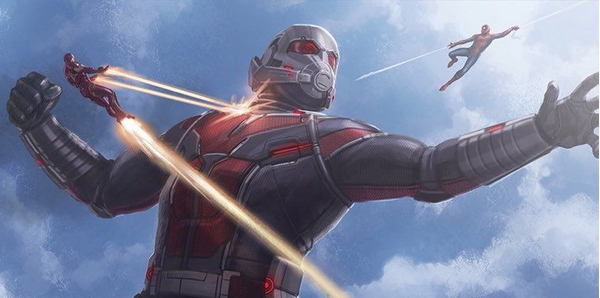

Different chemical property values vary in different ranges. There are properties, as mass, length, etc. that can be measured in a wide range, say 10<sup>-10</sup> -- 10<sup>10</sup>, but are usually relatively close within observed data - say, bond length. On the other hand, there are properties as isotope half-life, that range from 10<sup>-24</sup> to 10<sup>30</sup>. <br>Ranges of various chemical properties are illustrated in the following picture:

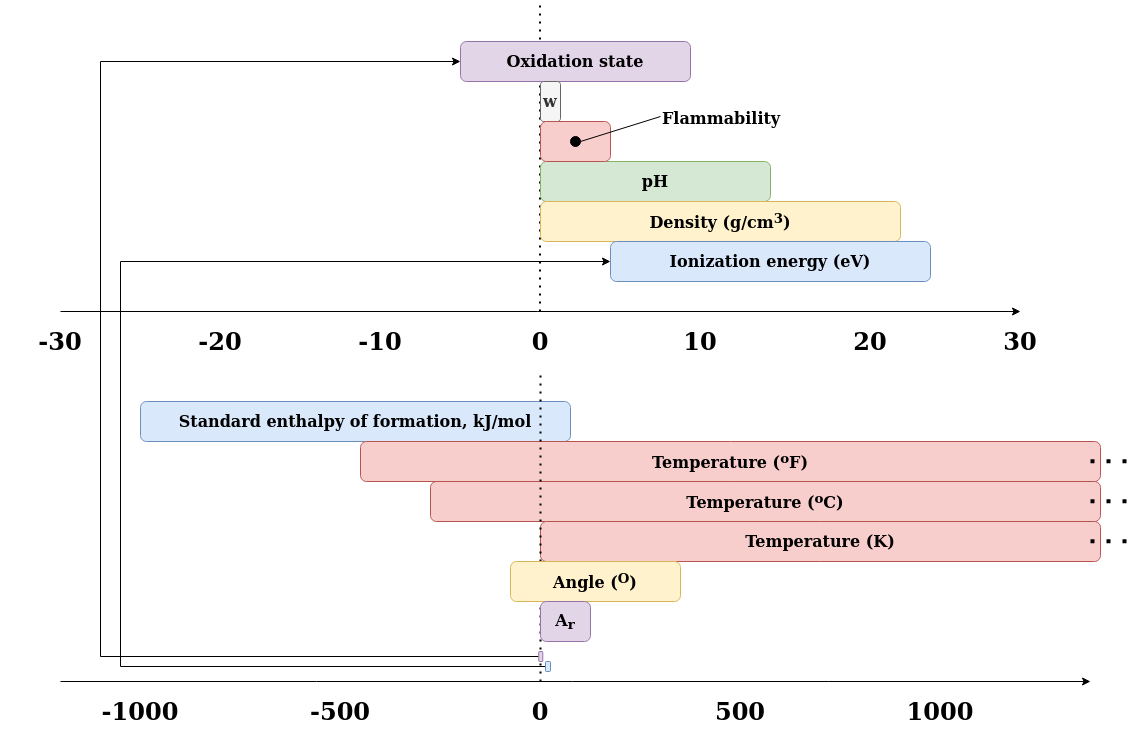

In order to work with the data, one can suggest using standartization and normalization. To understand these terms, let's take a look at an acid dataset

## Understanding standartization and normalization: Acids

We'll import a short acid dataset. Some of acid properties we'll look into:
- K<sub>a</sub> (acid dissociation constant)
- Mr (molar mass, g/mol)
- BP (boiling point, <sup>o</sup>C)
- Solubility (mg/L)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_acids = pd.read_csv('../../data/acids.csv', index_col=0)
df_acids.describe().loc[['min', 'max']]

,Ka,pKa,Molar mass (g/mol),Boiling Pt (oC) [EPISuite],Solubility (mg/L) [EPISuite],pSolubility
min,1.000000e-14,-9.50515,18.015,35.70,2493.0,3.396722
max,3.200000e+09,14.00000,192.124,640.51,1000000.0,6.000000


As we can see, the range of K<sub>a</sub> (min-max) is much higher than any other. Using `log` aka pK<sub>a</sub>  and pSolubility allows us to boxplot all values within one plot:

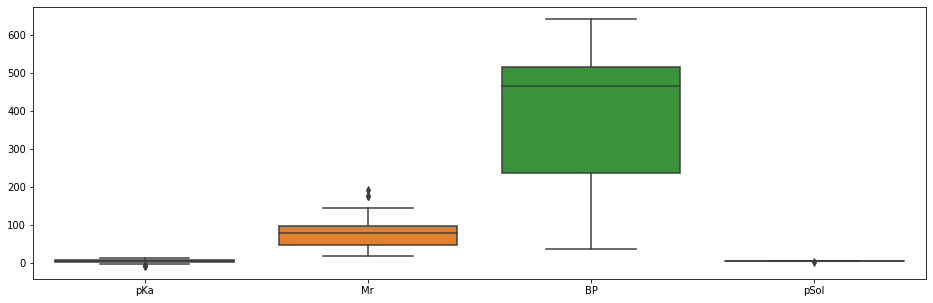

In [2]:
df_acids_cleaned = df_acids[['pKa', 'Molar mass (g/mol)', 'Boiling Pt (oC) [EPISuite]','pSolubility']]
df_acids_cleaned.columns = ['pKa', 'Mr', 'BP', 'pSol']
plt.figure(figsize=(16, 5))
ax = sns.boxplot(data=df_acids_cleaned)

Even now, it's quite hard to estimate some of the distributions. Data transformation, in general, is aimed to improve numerical data understanding by both you and machine
<br><b>Rescaling</b> typically means to add/subtract/multiply/divide by a constant. Sometimes a set of operation is used. Most common is changing units of measurement, say, converting from Celsius to Fahrenheit.
<br><b>Normalization</b> typically means rescales the values into a range of [0,1]. 
<br><b>Standardization</b> typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

I believe a correct illustrations is better than a dozen words. On the plot below, we'll visualize normalized and standartized data

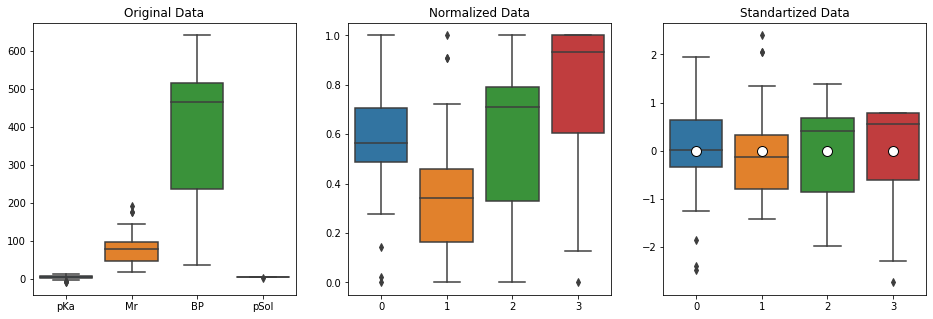

In [3]:
fig, axs = plt.subplots(1, 3, figsize = (16, 5))
sns1 = sns.boxplot(ax = axs[0], data=df_acids_cleaned)
sns2 = sns.boxplot(ax = axs[1], data=MinMaxScaler().fit_transform(df_acids_cleaned))
sns3 = sns.boxplot(ax = axs[2], data=StandardScaler().fit_transform(df_acids_cleaned), showmeans=True, 
                   meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
sns1.set(title='Original Data')
sns2.set(title='Normalized Data')
sns3.set(title='Standartized Data')
plt.show()

Now it's much easier and effective to work with data, isn't it? 
<br> Both methods improve numerical data, making it less sensitive to the scale of features.
<br> There are several ways to normalize and standartize data. We'll use `MinMaxScaler()` and `StandardScaler()`. You can find applications of other methods and formula in the appendix 

<hr>

Let's take a look at one of the public water quality datasets

## Studying Water Quality with Neural Networks

Dataset source: https://data.cityofnewyork.us/Environment/Harbor-Water-Quality/5uug-f49n<br/>

In [4]:
water_df = pd.read_csv('../../downloads/Harbor_Water_Quality.csv')
water_df

/home/ireznikov/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,4,5,6,10,11,12,13,20,21,26,27,31,33,34,35,38,39,40,43,44,45,46,47,48,49,51,53,55,59,60,61,64,65,76,82,83,88,94,95,96,97,98) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Sampling Location,Duplicate Sample,Sample Date,Sample Time,Weather Condition (Dry or Wet),Top Sample Temperature (ºC),Bottom Sample Temperature (ºC),Site Actual Depth (ft),Top Sample Depth(ft),Bottom Sample Depth (ft),...,Oakwood BOD Top Sample (mg/L),Oakwood BOD Bottom Sample(mg/L),Oakwood Total Suspended Solid Top Sample (mg/L),Oakwood Total Suspended Solid Bottom Sample (mg/L),Top Turbidity( Nephelometric Turbidity Units),Bottom Turbidity YSI (Nephelometric Turbidity Units),Sampling Comment,Long,Lat,Type
0,BR5,NaN,08/17/2015,1:07 PM,Dry,24.68,NaN,13.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.8713,40.8137,Permanent
1,K2,NaN,07/06/1965,9:50 AM,NaN,22.8,22.2,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-74.153,40.6412,Permanent
2,N8,NaN,07/16/1909,4:10 PM,NaN,20,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-74.0455,40.6062,Permanent
3,N9,NaN,07/27/1972,9:22 AM,NaN,17.2,16.1,NaN,NaN,NaN,...,0.6,0.6,NaN,NaN,NaN,NaN,NaN,-73.9833,40.5683,Permanent
4,NC0,NaN,02/26/2014,10:45 AM,Dry,2.51,2.46,15.0,3.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Light snow,-73.9316,40.715,Permanent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91892,N16,NaN,07/25/1974,10:13 AM,NaN,19.4,19.4,NaN,NaN,NaN,...,4.5,3.0,NaN,NaN,NaN,NaN,NaN,-73.9437,40.5297,Permanent
91893,TNQ,NaN,08/07/1978,10:05 AM,NaN,22.8,22.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.792,40.7949,Permanent
91894,J1,NaN,06/30/1977,11:05 AM,NaN,21.1,20,NaN,NaN,NaN,...,2.7,3.0,NaN,NaN,NaN,NaN,NaN,-73.8847,40.5733,Permanent
91895,J2,NaN,08/04/1977,12:42 PM,NaN,24.4,23.3,NaN,NaN,NaN,...,0.8,0.4,NaN,NaN,NaN,NaN,NaN,-73.8858,40.6081,Permanent


In [5]:
pd.DataFrame(data=water_df.isna().sum()).sort_values(0).iloc[:25]

,0
Type,0
Lat,7
Sampling Location,1620
Sample Date,1620
Long,1627
Sample Time,5488
Current Direction (Current Direction),13434
Winkler Method Top Dissolved Oxygen (mg/L),15001
Winkler Method Bottom Dissolved Oxygen (mg/L),17437
Top Sample Temperature (ºC),20601


The matrix is quite sparse, so we'll take a couple of properties presented well. Top Fecal Coliform Bacteria (Cells/100mL) will be our target column

In [6]:
w_df = water_df[['Winkler Method Top Dissolved Oxygen (mg/L)','Top Sample Temperature (ºC)','Site Actual Depth (ft)','Top Nitrate/Nitrite (mg/L)','Top PH','Top Total Suspended Solid (mg/L)']].dropna(axis=0)
w_df.columns = ['O2','Temp','Depth','NRatio','pH','target']

In [7]:
w_df = w_df[pd.to_numeric(w_df['Temp'], errors='coerce').notnull()]
w_df['Temp'] = w_df['Temp'].astype(float)
w_df = w_df[pd.to_numeric(w_df['NRatio'], errors='coerce').notnull()]
w_df['NRatio'] = w_df['NRatio'].astype(float)
w_df = w_df[pd.to_numeric(w_df['pH'], errors='coerce').notnull()]
w_df['pH'] = w_df['pH'].astype(float)

In [8]:
w_df.shape

(24934, 6)

In [9]:
w_df.dtypes

O2        float64
Temp      float64
Depth     float64
NRatio    float64
pH        float64
target    float64
dtype: object

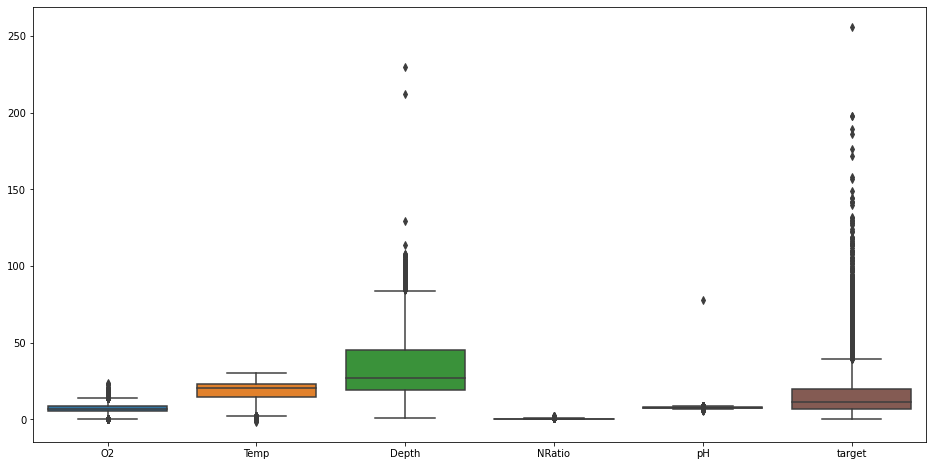

In [10]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(data=w_df)

In [11]:
w_df['pH'].max()

78.0

In [12]:
w_df.loc[w_df['pH'] == 78] 

,O2,Temp,Depth,NRatio,pH,target
77935,10.71,6.08,38.0,0.431,78.0,12.0


In [13]:
w_df.loc[w_df['pH'] == 78,'pH'] = 7.8

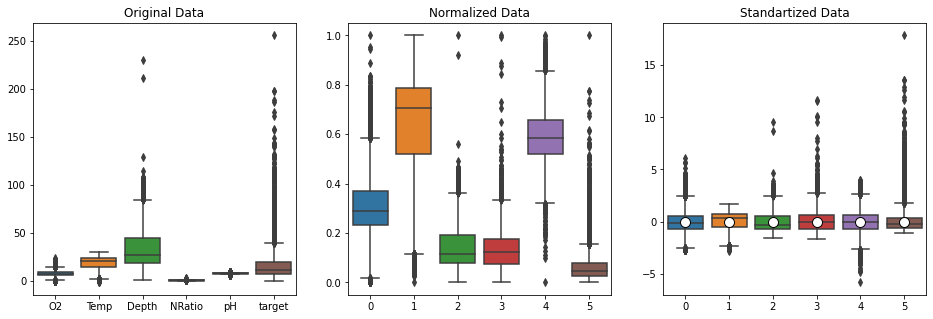

In [14]:
fig, axs = plt.subplots(1, 3, figsize = (16, 5))
sns1 = sns.boxplot(ax = axs[0], data=w_df)
sns2 = sns.boxplot(ax = axs[1], data=MinMaxScaler().fit_transform(w_df))
sns3 = sns.boxplot(ax = axs[2], data=StandardScaler().fit_transform(w_df), showmeans=True, 
                   meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
sns1.set(title='Original Data')
sns2.set(title='Normalized Data')
sns3.set(title='Standartized Data')
plt.show()

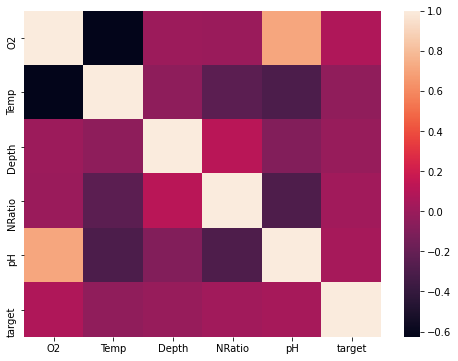

In [15]:
_, ax = plt.subplots(1,1, figsize=(8,6))
corr_matrix = w_df.corr()
ax = sns.heatmap(corr_matrix)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import os
os.environ['PYTHONHASHSEED']=str(1)
import random
import numpy as np
from numpy.random import seed
seed(1)

##Tensorflow stuff. Don't bother. Will be studied later. Currently used as demonstration
import tensorflow as tf
import keras
from keras import backend as K
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential

In [17]:
#Don't bother understanding, as we'll be studying this stuff a bit later. Currently used as demonstration

def reset_random_seeds(rs = 124):
    os.environ['PYTHONHASHSEED']=str(rs)
    tf.random.set_seed(rs)
    np.random.seed(rs)
    random.seed(rs)
    return rs

def build_model(x1,y1, X_train):
    reset_random_seeds()
    model = Sequential()
    #The number of neurons in the input layer is the number of features + 1
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    #The number of neurons in the hidden layer we'll take as number_of_train_samples/(number_of_neurons_before+number_of_neurons_after)
    model.add(Dense(X_train.shape[0]//(X_train.shape[1]+1), activation='relu'))
    model.add(Dense(X_train.shape[0]//(X_train.shape[1]+1)//4, activation='relu'))
    model.add(Dense(1, activation='linear'))
    return model

def generate_model(df, show_model=False):
    x1 = df[list(df.columns[:-1])].to_numpy()
    y1 = np.array(df['target'])
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, random_state=26)
    model = build_model(x1,y1, X_train)
    if show_model:
        model.summary()
    return model, X_train, y_train, X_test, y_test

def run_training(model, X_train, y_train, X_test, vb=0, return_history=False):
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    history=model.fit(X_train, y_train, epochs=20, verbose=vb, batch_size=250, validation_split=0.2)
    predictions = model.predict(X_test)
    if return_history:
        return predictions, history
    else:
        return predictions

def draw_history_plot(history):
    print(history.history.keys())
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    return plt

In [18]:
reset_random_seeds()

124

In [19]:
model, X_train, y_train, X_test, y_test = generate_model(w_df, False)
predictions, history = run_training(model, X_train, y_train, X_test, vb=1, return_history=True)
mae_basic = mean_absolute_error(y_test, predictions)
mae_basic

Epoch 1/20
60/60 [==============================] - 2s 25ms/step - loss: 214.3787 - mse: 214.3787 - mae: 9.7266 - val_loss: 195.4807 - val_mse: 195.4807 - val_mae: 9.1072
Epoch 2/20
60/60 [==============================] - 1s 23ms/step - loss: 182.8399 - mse: 182.8399 - mae: 8.9760 - val_loss: 192.2932 - val_mse: 192.2932 - val_mae: 9.2933
Epoch 3/20
60/60 [==============================] - 1s 23ms/step - loss: 181.5515 - mse: 181.5515 - mae: 8.9917 - val_loss: 192.6559 - val_mse: 192.6559 - val_mae: 9.3685
Epoch 4/20
60/60 [==============================] - 1s 24ms/step - loss: 181.5552 - mse: 181.5552 - mae: 8.9751 - val_loss: 192.2881 - val_mse: 192.2881 - val_mae: 9.0230
Epoch 5/20
60/60 [==============================] - 1s 24ms/step - loss: 181.3206 - mse: 181.3206 - mae: 8.9657 - val_loss: 192.2246 - val_mse: 192.2246 - val_mae: 9.1556
Epoch 6/20
60/60 [==============================] - 1s 24ms/step - loss: 181.1785 - mse: 181.1785 - mae: 8.9731 - val_loss: 192.3309 - val_mse: 1

9.122472303829248

Modification A: pH

pH varies from 0(acid) to 14(base), being neutral at 7. This scale is quite intuitive and easy to use, based on H+ concentration. But from statistical point of view, it makes sense to use the scale, where 0 will represent neutral, thus, it'll range from -7 to 7.<br/>
Another way will be to use `StandardScaler()` method. <br/>

In [20]:
def pH_mod():
    w_df_mod = w_df.copy()
    w_df_mod.insert(4, "pH_stand", w_df_mod['pH'] - 7)
    w_df_mod.drop(['pH'], inplace=True, axis=1)
    return w_df_mod

In [21]:
model, X_train, y_train, X_test, y_test = generate_model(pH_mod())
mae_pH_mod = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_pH_mod

9.100640987406031

Modification B: NRatio (Top Nitrate/Nitrite (mg/L)) 

In [22]:
def NRatio_mod():
    w_df_mod = w_df.copy()
    w_df_mod.insert(4, "NRatio_normalized", w_df_mod['NRatio']/(1 + w_df_mod['NRatio']))
    w_df_mod.drop(['NRatio'], inplace=True, axis=1)
    return w_df_mod

In [23]:
model, X_train, y_train, X_test, y_test = generate_model(NRatio_mod())
mae_NRatio_mod = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_NRatio_mod

9.11997417809759

In [24]:
def pH_NRatio_mod():
    w_df_mod = w_df.copy()
    w_df_mod.insert(4, "pH_stand", w_df_mod['pH'] - 7)
    w_df_mod.drop(['pH'], inplace=True, axis=1)
    w_df_mod.insert(4, "NRatio_normalized", w_df_mod['NRatio']/(1 + w_df_mod['NRatio']))
    w_df_mod.drop(['NRatio'], inplace=True, axis=1)
    return w_df_mod

In [25]:
model, X_train, y_train, X_test, y_test = generate_model(pH_NRatio_mod())
mae_pH_NRatio_mod = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_pH_NRatio_mod

9.105158062072988

### Standartization

In [26]:
def generate_standartized_model(df):
    std_scale = StandardScaler().fit(df[list(df.columns[:-1])])
    xscale = std_scale.transform(df[list(df.columns[:-1])])
    y1 = np.array(df['target'])

    X_train, X_test, y_train, y_test = train_test_split(xscale, y1, random_state=26)
    model = build_model(xscale,y1, X_train)  
    return model, X_train, y_train, X_test, y_test

In [27]:
model, X_train, y_train, X_test, y_test = generate_standartized_model(w_df)
mae_basic_std = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_basic_std

9.084948804180401

In [28]:
model, X_train, y_train, X_test, y_test = generate_standartized_model(pH_mod())
mae_pH_mod_std = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_pH_mod_std

9.084948804180401

In [29]:
model, X_train, y_train, X_test, y_test = generate_standartized_model(NRatio_mod())
mae_NRatio_mod_std = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_NRatio_mod_std

9.104642615387139

In [30]:
model, X_train, y_train, X_test, y_test = generate_standartized_model(pH_NRatio_mod())
mae_pH_NRatio_mod_std = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_pH_NRatio_mod_std

9.104642615387139

### Normalization

In [31]:
def generate_normalized_model(df):
    x1 = df[list(df.columns[:-1])].to_numpy()
    y1 = np.array(df['target'])
    y1 = np.reshape(y1, (-1,1))
    scaler_x = MinMaxScaler()
    scaler_x.fit(x1)
    xscale=scaler_x.transform(x1)
    X_train, X_test, y_train, y_test = train_test_split(xscale, y1, random_state=26)
    model = build_model(xscale,y1, X_train)
    return model, X_train, y_train, X_test, y_test

In [32]:
model, X_train, y_train, X_test, y_test = generate_normalized_model(w_df)
mae_basic_norm = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_basic_norm

9.109509358098578

In [33]:
model, X_train, y_train, X_test, y_test = generate_normalized_model(pH_mod())
mae_pH_mod_norm = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_pH_mod_norm

9.109509358098578

In [34]:
model, X_train, y_train, X_test, y_test = generate_normalized_model(NRatio_mod())
mae_NRatio_mod_norm = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_NRatio_mod_norm

9.131763739593525

In [35]:
model, X_train, y_train, X_test, y_test = generate_normalized_model(pH_NRatio_mod())
mae_pH_NRatio_mod_norm = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))
mae_pH_NRatio_mod_norm

9.131763739593525

<AxesSubplot:>

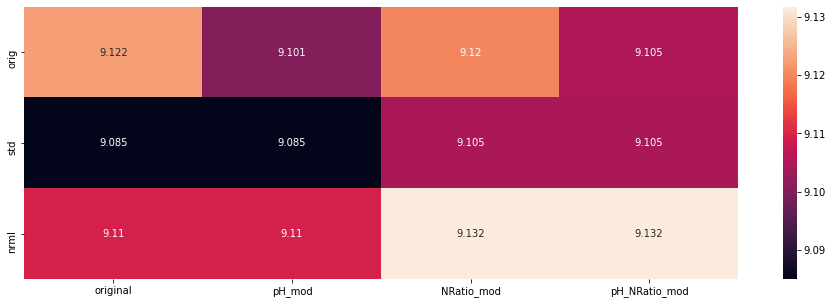

In [36]:
plt.figure(figsize=(16, 5))
score_arr = [[mae_basic, mae_pH_mod,mae_NRatio_mod,mae_pH_NRatio_mod],[mae_basic_std, mae_pH_mod_std,mae_NRatio_mod_std,mae_pH_NRatio_mod_std],[mae_basic_norm, mae_pH_mod_norm,mae_NRatio_mod_norm,mae_pH_NRatio_mod_norm]]
sns.heatmap(data = pd.DataFrame(score_arr, columns=['original', 'pH_mod', 'NRatio_mod', 'pH_NRatio_mod'], 
                         index=['orig', 'std', 'nrml']), annot=True, fmt=".4")

In [37]:
#Loading data for 101 folds
error_df = pd.read_json('mae_water_quality.json')

In [38]:
mean_arr, sub_arr = [], []
for i, val in enumerate(error_df.describe().loc[['mean']].values[0]):
#for i, val in enumerate(error_df.iloc[RS].values):   
    sub_arr.append(val)
    if (i+1)%4 == 0:
        mean_arr.append(sub_arr)
        sub_arr = []
median_arr = []
for i, val in enumerate(error_df.describe().loc[['50%']].values[0]):
    sub_arr.append(val)
    if (i+1)%4 == 0:
        median_arr.append(sub_arr)
        sub_arr = []

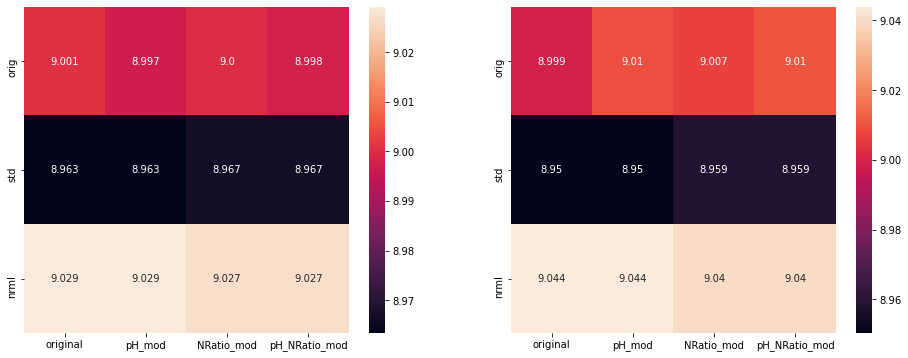

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16, 6))
sns.heatmap(data = pd.DataFrame(mean_arr, columns=['original', 'pH_mod', 'NRatio_mod', 'pH_NRatio_mod'], 
                         index=['orig', 'std', 'nrml']), annot=True, fmt=".4", ax=ax1)
sns.heatmap(data = pd.DataFrame(median_arr, columns=['original', 'pH_mod', 'NRatio_mod', 'pH_NRatio_mod'], 
                         index=['orig', 'std', 'nrml']), annot=True, fmt=".4", ax=ax2)
plt.show()

As we can see, the best results are achieved simply standartizing original data.
<br><i>Q: Have you noticed something strange on the heatmap? Can you explain the reason? </i>

<hr>

## Studying Radioactive Isotopes with Support Vector Machine

Now let's take a look at another data source, containing information about element half-lifes. <br>Data source: https://www.nndc.bnl.gov/nudat2/NuDatCombinedPlotServlet

Unfortunately, we don't have a dataset we are used to. This just only means we'll create one ourself using the data source we have:

In [40]:
import re
REGEX_Z = '(?<=(z = ))\d+'
REGEX_N = '(?<=(n = ))\d+'
REGEX_X = '.*(?=\s)'

def read_textfile(filename, col=1):
    f = open(filename, "r")
    z,n,X = 0, 0, 0
    _arr = []
    for idx, row in enumerate(f):
            if idx > 1:
                if 'Lines grouped by N' in row:
                    break
                elif idx%2 == 0:
                    z = int(re.search(REGEX_Z, row)[0])
                    n = int(re.search(REGEX_N, row)[0])
                elif idx%2 == 1:                    
                    X = float(re.findall(REGEX_X, row)[0].split(';')[col-1])
                    _arr.append([z,n,z+n,X])
    f.close()
    return _arr

In [41]:
#Half-life
hl_df = pd.DataFrame(data = read_textfile("../../downloads/half-life.txt", 1))
hl_df.shape

(2777, 4)

In [42]:
#Electron capture followed by proton emission Q-value, i.e. energy released in this decay
qecp_df = pd.DataFrame(data=read_textfile("../../downloads/QECp.txt", 2))
qecp_df.shape

(1441, 4)

In [43]:
#First excited state energy
exst_df = pd.DataFrame(data=read_textfile("../../downloads/energy for 1st exicited state.txt", 2))
exst_df.shape

(2172, 4)

In [44]:
#Two neutron separation energy, i.e. energy needed to remove two neutrons
s2n_df = pd.DataFrame(data=read_textfile("../../downloads/S2n.txt", 2))
s2n_df.shape

(3107, 4)

In [45]:
merge_df = pd.merge(hl_df, qecp_df, how='inner', on=[0, 1, 2])
merge_df = pd.merge(merge_df, exst_df, how='inner', on=[0, 1, 2])
merge_df = pd.merge(merge_df, s2n_df, how='inner', on=[0, 1, 2])

In [46]:
merge_df.columns = ['z','n','A','T1/2', 'QECp', '1st_E', 's2n']
merge_df.sort_values(['T1/2'], ascending=False, inplace=True)
merge_df.describe().loc[['min','mean','50%','max']]

,z,n,A,T1/2,QECp,1st_E,s2n
min,5.000000,3.000000,8.000000,1.139253e-20,26.150000,1.580000,11802.769531
mean,62.476731,80.830874,143.307605,6.455192e+22,8109.797722,385.972949,20667.597390
50%,66.000000,83.000000,149.000000,1.230000e+02,7430.259766,163.700000,19570.269531
max,110.000000,163.000000,273.000000,5.680370e+25,26001.000000,8250.000000,40541.000000


You can see that ranges of `z`, `n`, `A` and even `1st_ex_st_E` properties are close, whereas `QECp`, `s2n` and especially half-life time `T1/2` are much higher.Notice how big is the difference between the mean and the median values for `T1/2`. Let's illustrate how the plot changes if we use discard first N values:

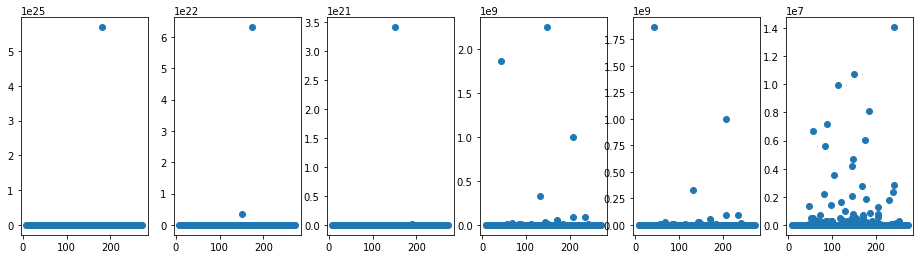

In [47]:
_, axes = plt.subplots(1,6, figsize=(16,4))
axes[0].scatter(merge_df['A'], merge_df['T1/2'])
axes[1].scatter(merge_df['A'].iloc[1:], merge_df['T1/2'].iloc[1:])
axes[2].scatter(merge_df['A'].iloc[2:], merge_df['T1/2'].iloc[2:])
axes[3].scatter(merge_df['A'].iloc[10:], merge_df['T1/2'].iloc[10:])
axes[4].scatter(merge_df['A'].iloc[11:], merge_df['T1/2'].iloc[11:])
axes[5].scatter(merge_df['A'].iloc[20:], merge_df['T1/2'].iloc[20:])

Not much. The data is too wide spread.

### Predicting energy needed to remove two neutrons

Let's try to predict energy needed to remove two neutrons aka s2n from the data we have. First, let's see how the data is correlated for `s2n`

In [48]:
merge_df.corr()['s2n']

z       -0.838413
n       -0.859428
A       -0.853956
T1/2    -0.033780
QECp     0.566949
1st_E    0.428720
s2n      1.000000
Name: s2n, dtype: float64

In this module we'll use tensorflow neural networks. You can skip the code, as this topic will be forward in the course

In [49]:
from  sklearn.svm import SVR
svr = SVR(kernel='rbf',C=5)

def run_sv_learning(df_train, df_target, rs=42):
    x1 = df_train
    y1 = np.array(df_target)
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, random_state=rs)
    svr.fit(X_train, y_train)
    predictions = svr.predict(X_test)
    return predictions, y_test

def return_train_test_cols(df):
    train_cols = list(df.columns[:6])
    target_col = df.columns[6]
    return train_cols, target_col

Setting train and target columns

In [50]:
merge_df.rename(columns={"s2n": "target"}, inplace=True)
train_cols, target_col = return_train_test_cols(merge_df)
train_cols, target_col

(['z', 'n', 'A', 'T1/2', 'QECp', '1st_E'], 'target')

#### Straithforward approach

In [51]:
predictions, y_test = run_sv_learning(merge_df[train_cols].to_numpy(), merge_df[target_col])
mean_absolute_error(y_test, predictions)

4276.539652581793

As value of half-life time are too high, you'll get an error, if you launch code in an NN as previous
<br>
```model, X_train, y_train, X_test, y_test = generate_model(merge_df)```
```mae_pH_mod = mean_absolute_error(y_test, run_training(model, X_train, y_train, X_test))```
<br>
It works for SVM though

#### logT1/2

It makes sense to use the log value of T1/2 rather than the original value. Let's see if it helps:

In [52]:
def T_log_mod(df):
    _df = df.copy()
    _df.insert(4, "log10T1/2", np.log10(df['T1/2']))
    return _df.drop('T1/2', axis=1)

In [53]:
train_cols, target_col = return_train_test_cols(T_log_mod(merge_df))
train_cols, target_col

(['z', 'n', 'A', 'log10T1/2', 'QECp', '1st_E'], 'target')

In [54]:
predictions, y_test = run_sv_learning(T_log_mod(merge_df)[train_cols].to_numpy(), T_log_mod(merge_df)[target_col])
mean_absolute_error(y_test, predictions)

4078.3922414741073

Apparently applying `log` on `T1/2` worked. Let's repeat this with the second largest column, `QECp` and see if that helps

#### log QECp

In [55]:
def QECp_log_mod(df):
    _df = T_log_mod(df).copy()
    _df.insert(4, "logQECp", np.log10(df['QECp']))
    return _df.drop('QECp', axis=1)

In [56]:
train_cols, target_col = return_train_test_cols(QECp_log_mod(merge_df))
train_cols, target_col

(['z', 'n', 'A', 'log10T1/2', 'logQECp', '1st_E'], 'target')

In [57]:
predictions, y_test = run_sv_learning(QECp_log_mod(merge_df)[train_cols].to_numpy(), QECp_log_mod(merge_df)[target_col])
mean_absolute_error(y_test, predictions)

4226.169467822049

As you can see, the error score hasn't increased. Using `log` isn't always helpful.
<br><i>Q: In order to estimate the influence of using `logQECp`, we `used T_log_mod(df).copy()` rather than `df.copy()`. Why? What result should we expect running the second option</i>

#### Normalization

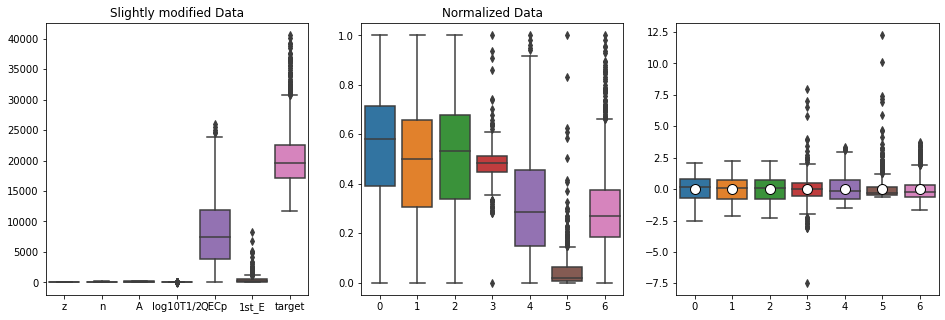

In [58]:
fig, axs = plt.subplots(1, 3, figsize = (16, 5))
sns1 = sns.boxplot(ax = axs[0], data=T_log_mod(merge_df))
sns2 = sns.boxplot(ax = axs[1], data=MinMaxScaler().fit_transform(T_log_mod(merge_df)))
sns3 = sns.boxplot(ax = axs[2], data=StandardScaler().fit_transform(T_log_mod(merge_df)), showmeans=True, 
                   meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
sns1.set(title='Slightly modified Data')
sns2.set(title='Normalized Data')
plt.show()

Wow! It seems that normalized distributions of `QECp` and our target data are quite close. Let's see if it'll help our predictions:

In [60]:
train_cols, target_col = return_train_test_cols(T_log_mod(merge_df))
train_cols, target_col

x1 = T_log_mod(merge_df)[train_cols].to_numpy()
y1 = np.array(T_log_mod(merge_df)[target_col])

xscale = MinMaxScaler().fit_transform(x1)

predictions, y_test = run_sv_learning(xscale, y1)
mean_absolute_error(y_test, predictions)

3850.81798118476

In [61]:
xscale = StandardScaler().fit_transform(x1)
predictions, y_test = run_sv_learning(xscale, y1)
mean_absolute_error(y_test, predictions)

3926.0909694155066

In [62]:
df_arr = []
for i in range(1, 100):
    rs_arr = []
    
    train_cols, target_col = return_train_test_cols(merge_df)
    predictions, y_test = run_sv_learning(merge_df[train_cols].to_numpy(), merge_df[target_col], i)
    rs_arr.append(mean_absolute_error(y_test, predictions))
    
    train_cols, target_col = return_train_test_cols(T_log_mod(merge_df))
    predictions, y_test = run_sv_learning(T_log_mod(merge_df)[train_cols].to_numpy(), T_log_mod(merge_df)[target_col], i)
    rs_arr.append(mean_absolute_error(y_test, predictions))
    
    train_cols, target_col = return_train_test_cols(QECp_log_mod(merge_df))
    predictions, y_test = run_sv_learning(QECp_log_mod(merge_df)[train_cols].to_numpy(), QECp_log_mod(merge_df)[target_col], i)
    rs_arr.append(mean_absolute_error(y_test, predictions))
    
    train_cols, target_col = return_train_test_cols(T_log_mod(merge_df))

    x1 = T_log_mod(merge_df)[train_cols].to_numpy()
    y1 = np.array(T_log_mod(merge_df)[target_col])
    xscale = MinMaxScaler().fit_transform(x1)

    predictions, y_test = run_sv_learning(xscale, y1, i)
    rs_arr.append(mean_absolute_error(y_test, predictions))
    
    xscale = StandardScaler().fit_transform(x1)
    predictions, y_test = run_sv_learning(xscale, y1, i)
    rs_arr.append(mean_absolute_error(y_test, predictions))
    
    df_arr.append(rs_arr)

<AxesSubplot:>

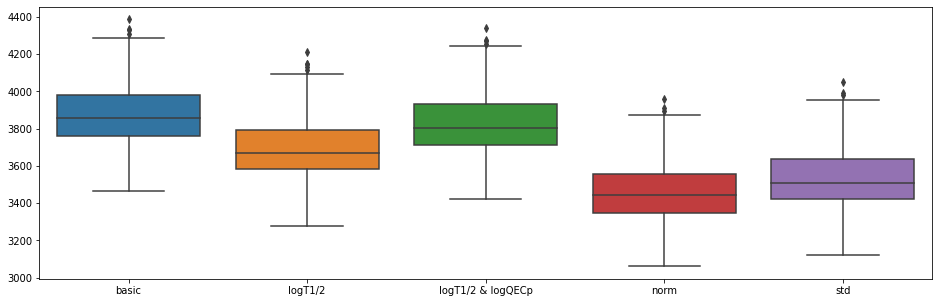

In [63]:
plt.figure(figsize=(16, 5))
sns.boxplot(data=pd.DataFrame(data=pd.DataFrame(df_arr, columns=['basic', 'logT1/2', 'logT1/2 & logQECp', 'norm', 'std'])))

In this case, normalizing the `logT1/2` data gives the best impact for our calculations

## Conclusions and Recomedations:

<ul>
    <li>When using standardization, your new data isn't bounded, unlike normalization.
    <li>It's more effective to use normalization when the distribution of the data is unknown, or known to be not Gaussian. If your data has a Gaussian distribution, consider using standardization. 
    <li>If normalized or standartized distribution close to the distribution of the target - go for it.
    <li>If you use several models|datasets - normalize|standartize them. Scaling issues are huge issues :)
    <li>Use data transformations as logarithms wisely
    <li>If you believe there is some hidden pattern|ratio between the features - may consider leaving as is.
    <li>Standardizing encoded features would mean assigning a distribution to categorical features.
        </ul>

Machine learning techniques:
<table style="text-align: left"> 
    <tr ><td><b>Consider using</b></td><td><b>Don't consider using</b></td></tr>
    <tr><td>Distance-Based Algorithms: k-Nearest Neighbors, k-Means, SVM</td>
        <td>Tree-Based Algorithms: Decision Tree and Random Forest</td></tr>
    <tr><td>Gradient Descent Based Algorithms: Linear and Logistic Regression, Perceptrons</td>
        <td>Naive Bayes</td></tr>

</table>
<br>
Boosting tecniques: catboost, LightGBM, XGBoost - Calculation speed increases after feature scaling
Any algorithm which is not distance based is not affected by feature scaling.

## Appendix

### Normalization

One of the normalization tecniques can be simple diving all your data to a max value. One of the most obvious cons is dealing with negative values

In [64]:
simple_max_norm_acids_df = df_acids_cleaned.copy()
for i in df_acids_cleaned.columns:
    simple_max_norm_acids_df[i] = simple_max_norm_acids_df[i]/simple_max_norm_acids_df[i].max()

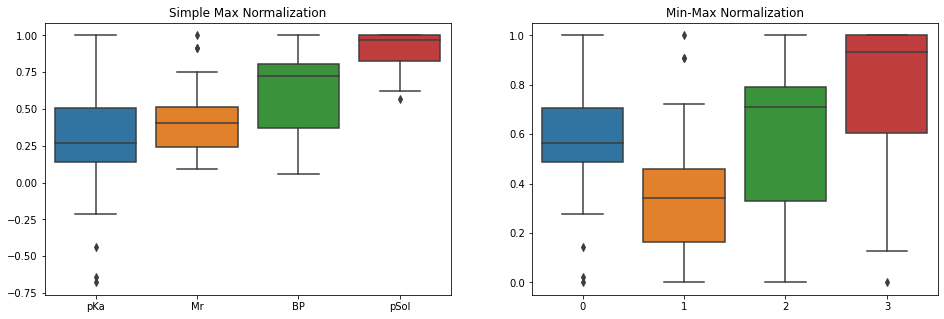

In [66]:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))
sns1 = sns.boxplot(ax = axs[0], data=simple_max_norm_acids_df)
sns2 = sns.boxplot(ax = axs[1], data=MinMaxScaler().fit_transform(df_acids_cleaned))
sns1.set(title='Simple Max Normalization')
sns2.set(title='Min-Max Normalization')
plt.show()

### Standartization

Robust standartization is used to scale features with statistics that are robust to outliers.
<br>X_scaled = (X — X.median) / (75th quantile — 25th quantile)

In [67]:
from sklearn.preprocessing import RobustScaler

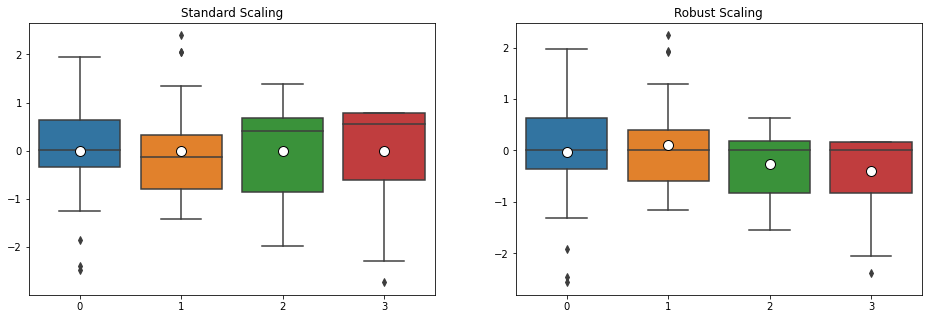

In [68]:
fig, axs = plt.subplots(1, 2, figsize = (16, 5))
sns1 = sns.boxplot(ax = axs[0], data=StandardScaler().fit_transform(df_acids_cleaned), showmeans=True, 
                   meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
sns2 = sns.boxplot(ax = axs[1], data=RobustScaler().fit_transform(df_acids_cleaned), showmeans=True, 
                   meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
sns1.set(title='Standard Scaling')
sns2.set(title='Robust Scaling')
plt.show()

## Additional links:

- https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
- https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network 

In [1]:
#to add references